In [ ]:
import numpy as np
import os
from math import ceil

import matplotlib.pyplot as plt
%matplotlib inline


import torch
import sys
sys.path.insert(0, './src')


from metrics import NDCG_binary_at_k_batch, Recall_at_k_batch
from models import MultiVAE, MultiDAE, Multi_our_VAE, MultiHoffmanVAE, Multi_ourHoffman_VAE
from training import train_model
from data import Dataset
from args import get_args
import pdb

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import ncvis

device = 'cpu'

class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

In [ ]:
args = dotdict({})
args.train_batch_size = 500
args.val_batch_size = 2000
args.data = 'ml20m'
args.device = device

args.learning_rate = 1e-4
args.n_epoches = 200
args.l2_coeff = 0.01 / args.train_batch_size
args.print_info_ = 1

args.annealing = True

if args.annealing:
    args.total_anneal_steps = 200000
    args.anneal_cap = 0.2
else:
    args.total_anneal_steps = 0
    args.anneal_cap = 1.

device_zero = torch.tensor(0., device=device, dtype=torch.float32)
device_one = torch.tensor(1., device=device, dtype=torch.float32)
std_normal = torch.distributions.Normal(loc=device_zero,
                                    scale=device_one)

In [3]:
txt_path = [os.path.join('./logs/', file) for file in sorted(os.listdir('./logs/')) if (file.startswith('metrics') and file.endswith('.txt'))]

In [3]:
y_max = 0.45
y_min = 0.35
n_epoches = 200

n_cols = 2
fig, ax = plt.subplots(nrows=ceil(len(txt_path) / n_cols), ncols=n_cols, figsize=(n_cols * 9, n_cols * 50), dpi=300)

for i in range(ceil(len(txt_path) / n_cols)):
    for j in range(n_cols):
        if (n_cols * i + j < len(txt_path)):
            path = txt_path[n_cols * i + j]
            title = path.split('/')[-1]
            with open(path, 'r') as file:
                data_ = np.array([float(metric) for metric in file.read().split()])
            data = np.zeros(n_epoches)
            data[:data_.shape[0]] = data_
            ax[i, j].set_title(title)
            ax[i, j].plot(np.arange(len(data)), data)
            ax[i, j].set_ylim((y_min, y_max))
            ax[i, j].set_yticks(np.linspace(y_min, y_max, 20))
#             ax[i, j].set_xticks(np.linspace(0, 200, 10))
            ax[i, j].grid()
        else:
            ax[i, j].axis('off')

In [4]:
for txt in txt_path:
    print('\'' + txt + '\',' )

'./logs/metrics_ml20m_MultiHoffmanVAE_K_1_N_1_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_MultiHoffmanVAE_K_1_N_1_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_MultiHoffmanVAE_K_2_N_2_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_MultiHoffmanVAE_K_2_N_2_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_MultiHoffmanVAE_K_3_N_3_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_MultiHoffmanVAE_K_3_N_3_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_MultiHoffmanVAE_K_5_N_5_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_MultiHoffmanVAE_K_5_N_5_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_MultiVAE_K_None_N_None_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_MultiVAE_K_None_N_None_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_1_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_1_learnreverse_False_anneal_T

In [51]:
####### Here you can comment what you dont want to plot
####### Dont forget to copy cell above
txt_path = [
'./logs/metrics_ml20m_MultiHoffmanVAE_K_1_N_1_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_MultiHoffmanVAE_K_1_N_1_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_MultiHoffmanVAE_K_2_N_2_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_MultiHoffmanVAE_K_2_N_2_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_MultiHoffmanVAE_K_3_N_3_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_MultiHoffmanVAE_K_3_N_3_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_MultiHoffmanVAE_K_5_N_5_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_MultiHoffmanVAE_K_5_N_5_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_MultiVAE_K_None_N_None_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_MultiVAE_K_None_N_None_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_1_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_1_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_1_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_1_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_2_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_2_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_2_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_2_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_3_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_3_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_3_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_3_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_5_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_5_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_5_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_1_N_5_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_2_N_1_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_2_N_1_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_2_N_1_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_2_N_1_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_2_N_2_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_2_N_2_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_2_N_2_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_2_N_2_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_3_N_1_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_3_N_1_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_3_N_1_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_3_N_1_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_3_N_3_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_3_N_3_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_3_N_3_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_3_N_3_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_5_N_1_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_5_N_1_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_5_N_1_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_5_N_1_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_5_N_5_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_ourHoffman_VAE_K_5_N_5_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_1_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_1_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_1_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_1_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_2_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_2_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_2_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_2_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_3_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_3_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_3_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_3_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_5_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_5_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_5_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_1_N_5_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_2_N_1_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_2_N_1_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_2_N_1_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_2_N_1_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_2_N_2_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_2_N_2_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_2_N_2_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_2_N_2_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_3_N_1_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_3_N_1_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_3_N_1_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_3_N_1_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_3_N_3_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_3_N_3_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_3_N_3_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_3_N_3_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_5_N_1_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_5_N_1_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_5_N_1_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_5_N_1_learnreverse_True_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_5_N_5_learnreverse_False_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_5_N_5_learnreverse_False_anneal_True.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_5_N_5_learnreverse_True_anneal_False.txt',
'./logs/metrics_ml20m_Multi_our_VAE_K_5_N_5_learnreverse_True_anneal_True.txt',
]

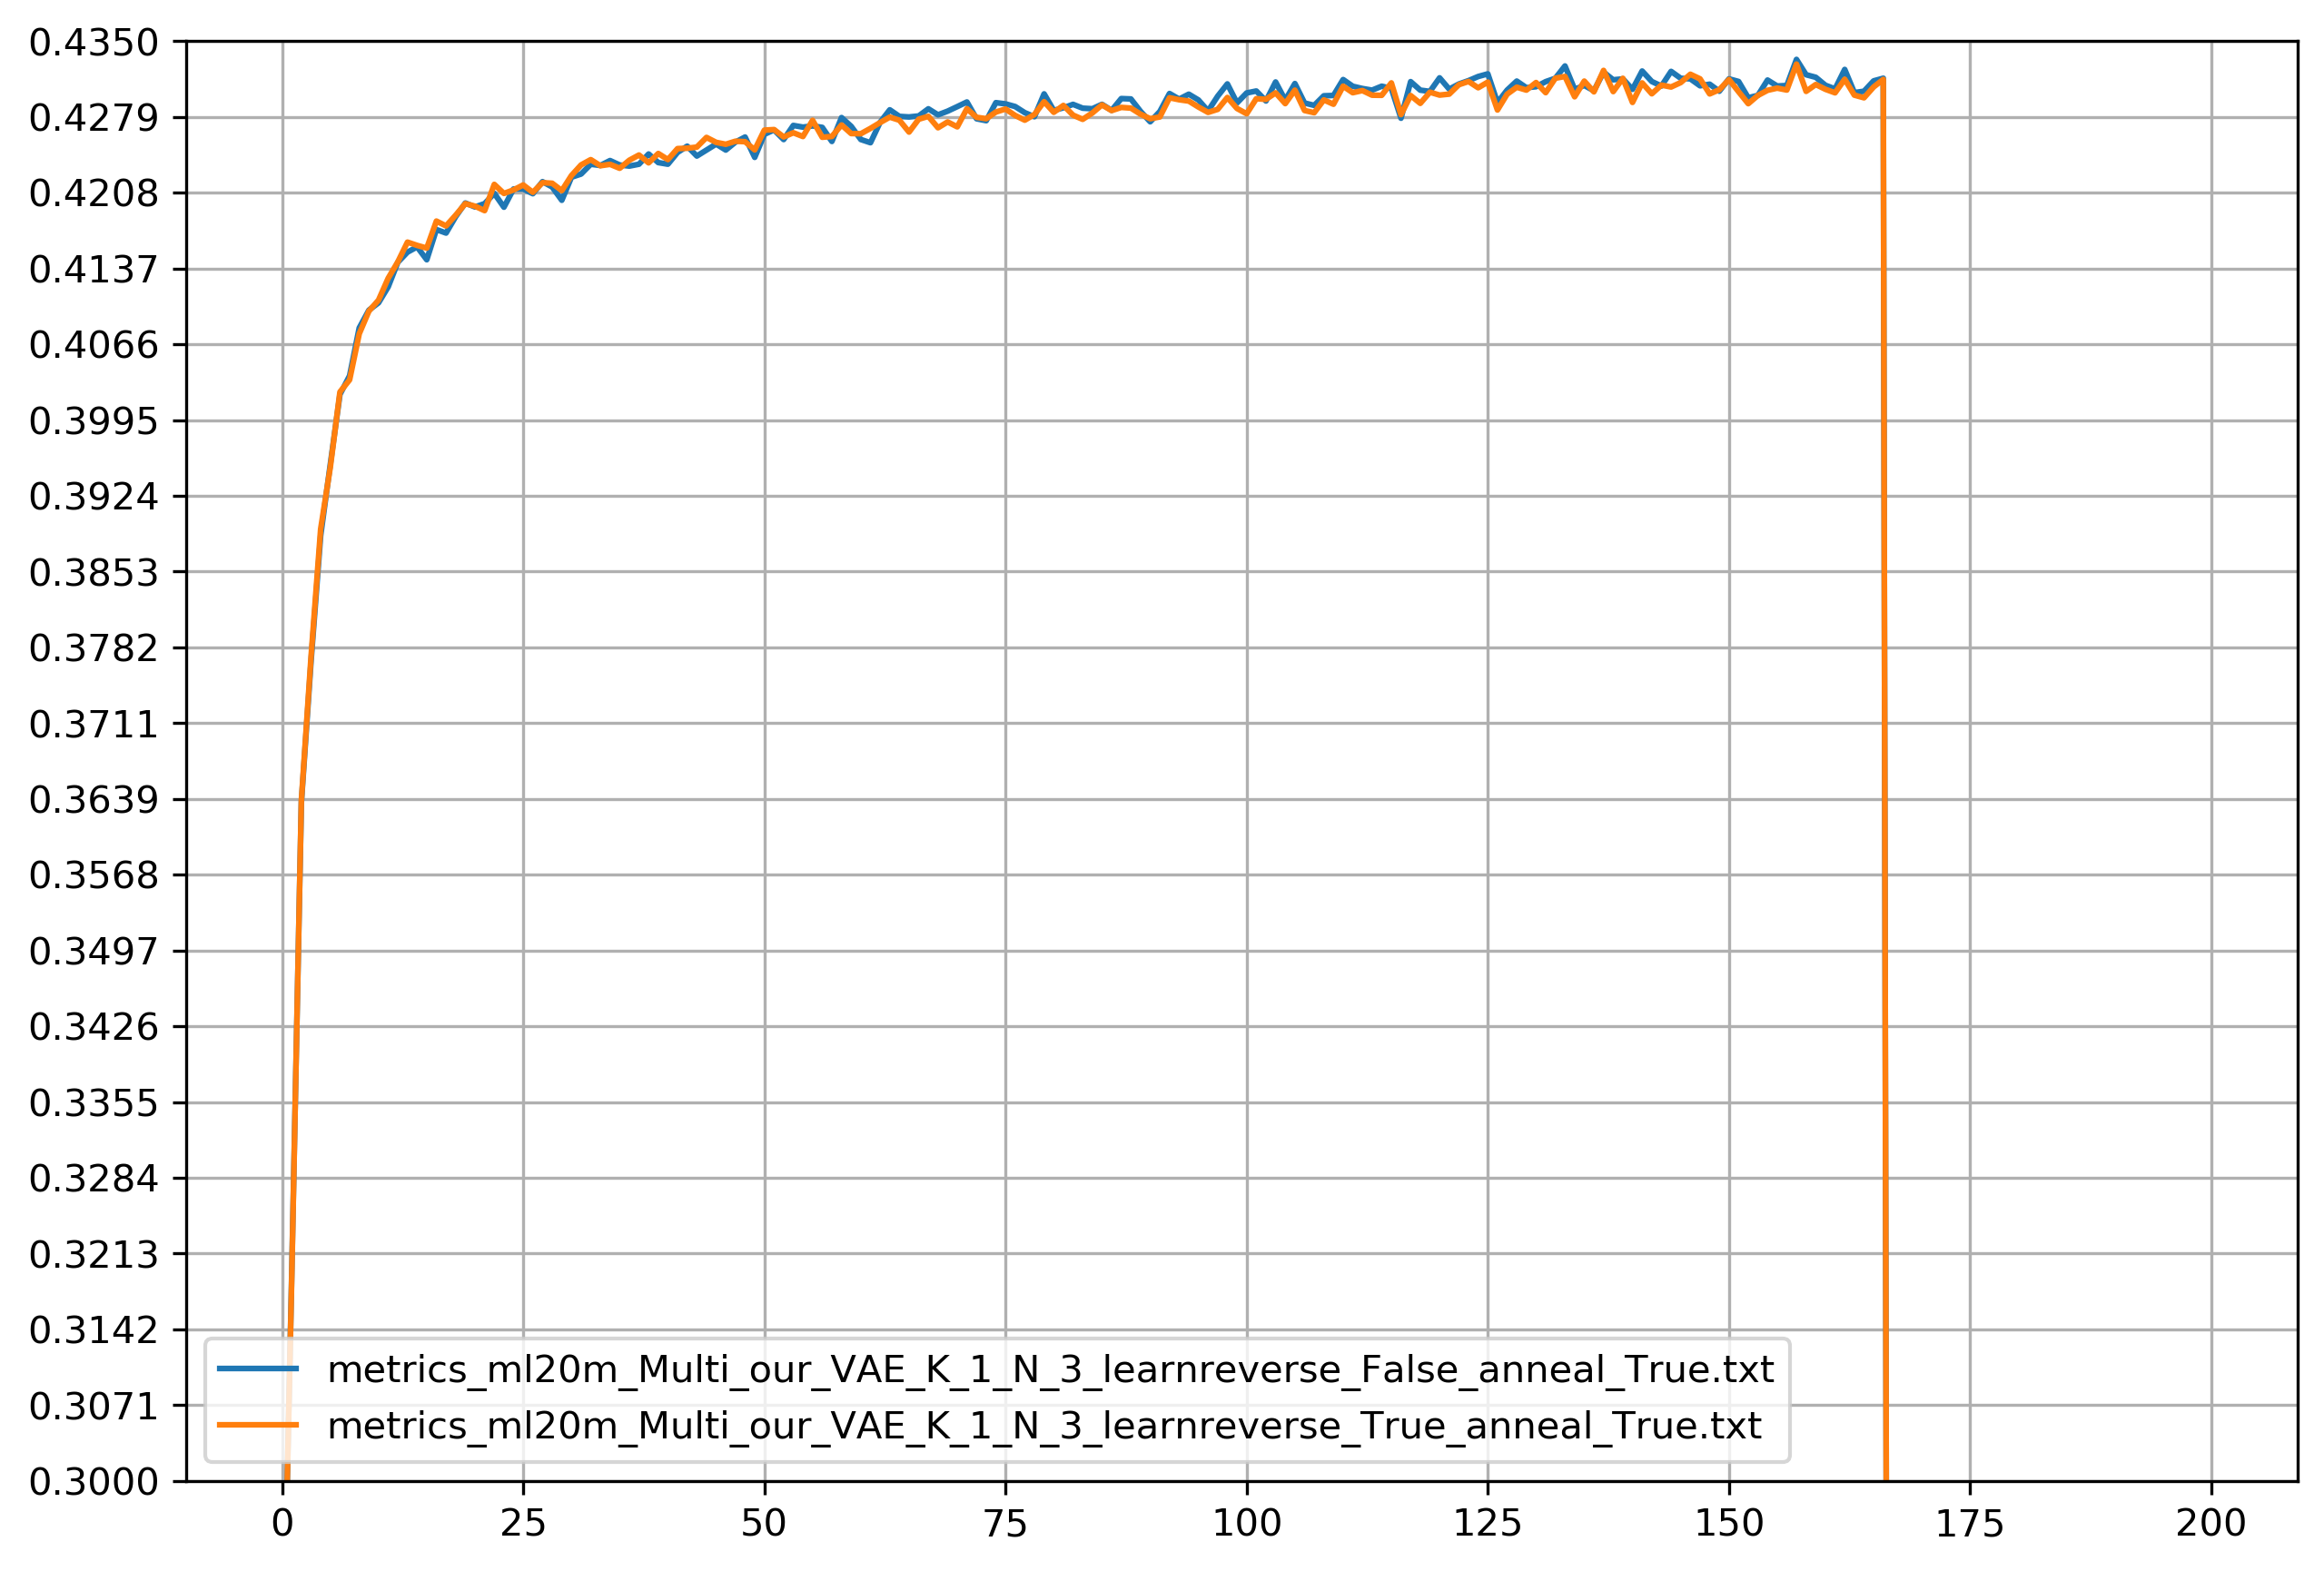

In [52]:
y_max = 0.435
y_min = 0.3

plt.figure(figsize=(10, 7), dpi=300)
for path in txt_path:
    title = path.split('/')[-1]
    with open(path, 'r') as file:
        data_ = np.array([float(metric) for metric in file.read().split()])
        data = np.zeros(n_epoches)
        data[:data_.shape[0]] = data_
        plt.plot(np.arange(len(data)), data, label=title)
plt.ylim((y_min, y_max))
plt.yticks(np.linspace(y_min, y_max, 20))
# plt.xticks(np.linspace(0, 200, 10))
plt.grid()
plt.legend();

## Posterior visialization

In [4]:
def load_model(path, device):
    
    device_zero = torch.tensor(0., device=device, dtype=torch.float32)
    device_one = torch.tensor(1., device=device, dtype=torch.float32)
    std_normal = torch.distributions.Normal(loc=device_zero,
                                        scale=device_one)
    uniform = torch.distributions.Uniform(low=device_zero, high=device_one)
    torch_log_2 = torch.tensor(np.log(2), device=device, dtype=torch.float32)

    model = torch.load(path, map_location=device)
    
    model.eval()
    model.std_normal = std_normal
    if hasattr(model, 'torch_log_2'):
        model.torch_log_2 = torch_log_2
    if hasattr(model, 'transitions'):
        model.transitions = model.transitions.to(device)
        if type(model.transitions) == type(torch.nn.ModuleList([])):
            for i in range(len(model.transitions)):
                model.transitions[i].device = device
                model.transitions[i].device_zero = device_zero
                model.transitions[i].device_one = device_one
        else:
            model.transitions.device = device
            model.transitions.device_zero = device_zero
            model.transitions.device_one = device_one
    if hasattr(model, 'reverse_kernel'):
        model.reverse_kernel = model.reverse_kernel.to(device)
        model.reverse_kernel.device = device
        model.device_one = device_one
        
    return model

In [15]:
model_list = ['./models/best_model_MultiVAE_K_None_N_None_learnreverse_False_anneal_True.pt',
              './models/best_model_Multi_our_VAE_K_5_N_1_learnreverse_True_anneal_True.pt',
              './models/best_model_Multi_our_VAE_K_5_N_5_learnreverse_True_anneal_True.pt',
              './models/best_model_Multi_ourHoffman_VAE_K_5_N_1_learnreverse_True_anneal_True.pt',
             ]
n_samples = 1000
args.val_batch_size = 1
dataset = Dataset(args, data_dir='./data/')

if args.val_batch_size == 1:
    encoded_representation_compressed = np.empty((len(model_list), 3, n_samples, 2))
    projections = np.empty((len(model_list), n_samples, 200))
else:
    encoded_representation_compressed = np.empty((len(model_list), 3, dataset.vad_data_tr.shape[0], 2))
    
for ind, model_name in enumerate(model_list):
    model = load_model(model_name, 'cpu')
    encoded_representation = torch.tensor([], device=args.device, dtype=args.torchType)
    if model_name.find('_our') > 0:
        encoder = model.encoder
        transitions = model.transitions
        target = model.target
        for bnum, batch_val in enumerate(dataset.next_val_batch()):
            out = encoder(batch_val[0])
            mu = out[:, :model.q_dims[-1]]
            x = batch_val[0]
            if args.val_batch_size == 1:
                std = out[:, model.q_dims[-1]:]
                u = std_normal.sample((n_samples, mu.shape[1]))
                z = mu + u * std
                x = x.repeat((n_samples, 1))
            else:
                z = mu
            p_ = std_normal.sample(z.shape)

            for i in range(len(transitions)):
                cond_vector = std_normal.sample(p_.shape)
                z, p_, _, _, _, _ = transitions[i].make_transition(q_old=z, x=x,
                                                                    p_old=p_,
                                                                    k=cond_vector,
                                                                    target_distr=target)
            current_representation = z
            encoded_representation = torch.cat([encoded_representation, current_representation.detach()], dim=0)
            if args.val_batch_size == 1:
                projections[ind] = z.cpu().detach().numpy()
                break
    else:
        encoder = model.encoder
        for bnum, batch_val in enumerate(dataset.next_val_batch()):   
            out = encoder(batch_val[0])
            mu = out[:, :model.q_dims[-1]]
            if args.val_batch_size == 1:
                std = out[:, model.q_dims[-1]:]
                u = std_normal.sample((n_samples, mu.shape[1]))
                z = mu + u * std
                projections[ind] = z.cpu().detach().numpy()
            else:
                z = mu
            current_representation = z
            encoded_representation = torch.cat([encoded_representation, current_representation.detach()], dim=0)
            if args.val_batch_size == 1:
                projections[ind] = z.cpu().detach().numpy()
                break
    del model

    encoded_representation = encoded_representation.cpu().detach().numpy()
    #### TSNE ####
    tsne = TSNE(n_components=2)
    encoded_representation_compressed[ind, 0] = tsne.fit_transform(encoded_representation)
    
    ### NCVIS ###
    vis = ncvis.NCVis()
    encoded_representation_compressed[ind, 1] = vis.fit_transform(encoded_representation)
    
    ### PCA ###
    pca = PCA(n_components=2)
    encoded_representation_compressed[ind, 2] = pca.fit_transform(encoded_representation)

### Compressed representation

In [ ]:
fig, ax = plt.subplots(nrows=len(model_list), ncols=3, figsize=(30, 45), dpi=300)

for i in range(len(model_list)):
    limx, limy = 40, 40
    ax[i, 0].set_title('TSNE_{}'.format(model_list[i]))
    ax[i, 0].scatter(encoded_representation_compressed[i, 0, :, 0], encoded_representation_compressed[i, 0, :, 1], alpha=0.25)
    ax[i, 0].set_xlim((-limx, limx))
    ax[i, 0].set_ylim((-limy, limy))
    ax[i, 0].set_xticks(np.arange(-limx, limx, 25))
    ax[i, 0].set_yticks(np.arange(-limy, limy, 25))
    ax[i, 0].set_aspect('equal', 'box')
    
    limx, limy = 35, 35
    ax[i, 1].set_title('NCVis_{}'.format(model_list[i]))
    ax[i, 1].scatter(encoded_representation_compressed[i, 1, :, 0], encoded_representation_compressed[i, 1, :, 1], alpha=0.25)
    ax[i, 1].set_xlim((-limx, limx))
    ax[i, 1].set_ylim((-limy, limy))
    ax[i, 1].set_xticks(np.arange(-limx, limx, 25))
    ax[i, 1].set_yticks(np.arange(-limy, limy, 25))
    ax[i, 1].set_aspect('equal', 'box')
    
    limx, limy = 35, 35
    ax[i, 2].set_title('PCA_{}'.format(model_list[i]))
    ax[i, 2].scatter(encoded_representation_compressed[i, 2, :, 0], encoded_representation_compressed[i, 2, :, 1], alpha=0.25)
    ax[i, 2].set_xlim((-limx, limx))
    ax[i, 2].set_ylim((-limy, limy))
    ax[i, 2].set_xticks(np.arange(-limx, limx, 25))
    ax[i, 2].set_yticks(np.arange(-limy, limy, 25))
    ax[i, 2].set_aspect('equal', 'box')

### Slices

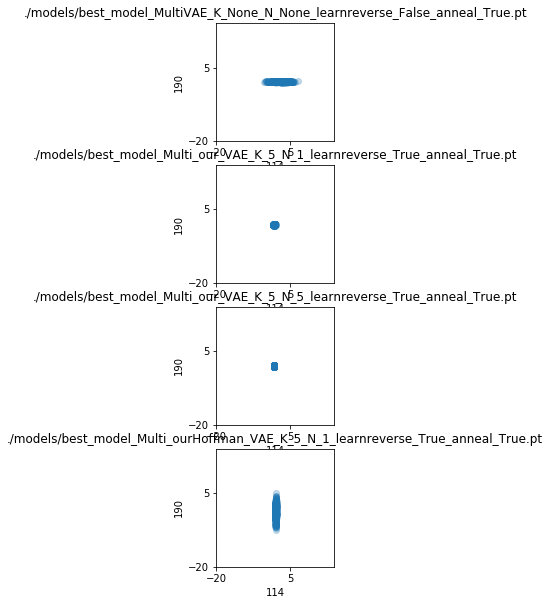

In [72]:
fig, ax = plt.subplots(nrows=len(model_list), figsize=(5, 10))

ax1, ax2 = np.random.randint(0, 200, 2)

for i in range(len(model_list)):
    limx, limy = 20, 20
    ax[i].set_title('{}'.format(model_list[i]))
    ax[i].scatter(projections[i, :, ax1], projections[i, :, ax2], alpha=0.25)
    ax[i].set_xlim((-limx, limx))
    ax[i].set_ylim((-limy, limy))
    ax[i].set_xticks(np.arange(-limx, limx, 25))
    ax[i].set_yticks(np.arange(-limy, limy, 25))
    ax[i].set_xlabel(ax1)
    ax[i].set_ylabel(ax2)
    ax[i].set_aspect('equal', 'box')